In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Read in suicide rate data

In [37]:
raw_df = pd.read_csv('raw_data.csv', header=1)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  549 non-null    object
 1   Sex      549 non-null    object
 2    2019    549 non-null    object
 3    2018    549 non-null    object
 4    2017    549 non-null    object
 5    2016    549 non-null    object
 6    2015    549 non-null    object
 7    2014    549 non-null    object
 8    2013    549 non-null    object
 9    2012    549 non-null    object
 10   2011    549 non-null    object
 11   2010    549 non-null    object
 12   2009    549 non-null    object
 13   2008    549 non-null    object
 14   2007    549 non-null    object
 15   2006    549 non-null    object
 16   2005    549 non-null    object
 17   2004    549 non-null    object
 18   2003    549 non-null    object
 19   2002    549 non-null    object
 20   2001    549 non-null    object
 21   2000    549 non-null    object
dtypes:

In [38]:
raw_df.shape

(549, 22)

In [39]:
raw_df.head()

,Country,Sex,2019,2018,2017,2016,2015,2014,2013,2012,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,Both sexes,6.0 [3.4-9.9],5.9 [3.4-9.8],6.0 [3.4-9.9],6.0 [3.5-9.9],6.0 [3.5-9.9],6.0 [3.5-9.9],6.2 [3.6-10.2],6.2 [3.6-10.2],...,6.8 [4.0-11.1],7.2 [4.2-11.7],7.4 [4.3-12.1],7.6 [4.4-12.3],7.6 [4.4-12.3],7.8 [4.5-12.6],7.7 [4.5-12.5],7.9 [4.5-12.8],7.9 [4.5-12.8],7.7 [4.4-12.5]
1,Afghanistan,Male,6.2 [3.5-10.5],6.2 [3.5-10.4],6.3 [3.7-10.7],6.2 [3.6-10.3],6.1 [3.6-10.2],6.1 [3.6-10.2],6.3 [3.7-10.5],6.4 [3.7-10.5],...,7.0 [4.1-11.6],7.4 [4.3-12.2],7.7 [4.5-12.6],7.8 [4.5-12.7],7.8 [4.5-12.7],7.9 [4.5-12.9],7.8 [4.5-12.8],8.0 [4.6-13.1],7.9 [4.5-12.9],7.6 [4.4-12.5]
2,Afghanistan,Female,5.7 [3.2-9.2],5.6 [3.2-9.1],5.5 [3.1-9.0],5.8 [3.3-9.5],5.8 [3.3-9.4],5.9 [3.4-9.5],6.0 [3.5-9.8],6.1 [3.6-9.8],...,6.6 [3.9-10.5],6.9 [4.0-11.0],7.1 [4.2-11.4],7.3 [4.3-11.7],7.4 [4.3-11.9],7.6 [4.4-12.2],7.6 [4.5-12.2],7.7 [4.5-12.4],7.9 [4.6-12.6],7.8 [4.5-12.4]
3,Albania,Both sexes,3.7 [2.1-5.7],3.9 [2.2-6.0],4.1 [2.3-6.3],4.2 [2.3-6.3],4.2 [2.3-6.4],4.5 [2.5-6.7],4.8 [2.7-7.1],4.8 [2.8-7.0],...,8.0 [4.8-10.8],8.1 [5.0-10.8],8.1 [5.0-10.6],7.8 [5.0-10.2],7.7 [4.9-10.0],4.9 [3.1-6.3],4.9 [3.3-6.4],4.8 [3.2-6.3],4.7 [3.2-6.2],5.2 [3.6-6.9]
4,Albania,Male,5.3 [2.7-8.3],5.6 [2.9-8.7],5.7 [2.9-9.0],5.7 [2.9-8.8],5.7 [2.9-8.7],6.2 [3.1-9.3],6.5 [3.4-9.7],6.6 [3.4-9.6],...,10.2 [5.4-14.0],10.5 [5.6-14.2],10.5 [5.8-14.1],10.1 [5.7-13.4],10.2 [5.9-13.4],6.7 [4.0-8.8],6.6 [4.1-8.7],6.6 [4.1-8.7],6.5 [4.2-8.5],7.6 [5.1-10.1]


Raw data is designed for human readability, I will melt the table

In [60]:
df = raw_df.melt(id_vars = ['Country','Sex'], 
                 value_vars = list(raw_df.columns[2:]),
                 var_name = 'Year',        
                 value_name = 'Rate')
df.head()

,Country,Sex,Year,Rate
0,Afghanistan,Both sexes,2019,6.0 [3.4-9.9]
1,Afghanistan,Male,2019,6.2 [3.5-10.5]
2,Afghanistan,Female,2019,5.7 [3.2-9.2]
3,Albania,Both sexes,2019,3.7 [2.1-5.7]
4,Albania,Male,2019,5.3 [2.7-8.3]


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  10980 non-null  object
 1   Sex      10980 non-null  object
 2   Year     10980 non-null  object
 3   Rate     10980 non-null  object
dtypes: object(4)
memory usage: 343.2+ KB


Keep the single rate value and drop the range values

In [62]:
df['Rate'] = df['Rate'].apply(lambda x: float(x.split(' ')[0]))
df['Year'] = df['Year'].apply(lambda x: int(x.strip()))
df.head()

,Country,Sex,Year,Rate
0,Afghanistan,Both sexes,2019,6.0
1,Afghanistan,Male,2019,6.2
2,Afghanistan,Female,2019,5.7
3,Albania,Both sexes,2019,3.7
4,Albania,Male,2019,5.3


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  10980 non-null  object 
 1   Sex      10980 non-null  object 
 2   Year     10980 non-null  int64  
 3   Rate     10980 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 343.2+ KB


Read in adult mortality data

- probability of dying between 15 and 60 years per 1000 population

In [75]:
raw_df_m = pd.read_csv('raw_data_mortality.csv', header=1)
raw_df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      3111 non-null   object
 1   Year         3111 non-null   int64 
 2    Both sexes  3111 non-null   int64 
 3    Male        3111 non-null   int64 
 4    Female      3111 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 121.6+ KB


In [76]:
raw_df_m.head()

,Country,Year,Both sexes,Male,Female
0,Afghanistan,2016,245,272,216
1,Afghanistan,2015,233,254,210
2,Afghanistan,2014,234,254,213
3,Afghanistan,2013,235,254,215
4,Afghanistan,2012,242,262,221


melt the table

In [77]:
df_m = raw_df_m.melt(id_vars = ['Country','Year'], 
                     value_vars = list(raw_df_m.columns[2:]),
                     var_name = 'Sex',        
                     value_name = 'count_per_1K')
df_m.head()

,Country,Year,Sex,count_per_1K
0,Afghanistan,2016,Both sexes,245
1,Afghanistan,2015,Both sexes,233
2,Afghanistan,2014,Both sexes,234
3,Afghanistan,2013,Both sexes,235
4,Afghanistan,2012,Both sexes,242


In [78]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9333 entries, 0 to 9332
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       9333 non-null   object
 1   Year          9333 non-null   int64 
 2   Sex           9333 non-null   object
 3   count_per_1K  9333 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 291.8+ KB


In [79]:
df['Year'].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000])

In [80]:
df_m['Year'].unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000])

Do countries match up in both tables?

In [81]:
set(df['Country']) - set(df_m['Country'])

set()

In [82]:
print(len(df['Country'].unique()))
print(len(df_m['Country'].unique()))

183
183


Yes

merge both tables on three keys - Country, Year, Gender, left join so rows are not gone away due to missing joining keys

In [95]:
merge_df = pd.merge(left = df, right = df_m, on = ['Country', 'Year', 'Sex'], how = 'left')
merge_df.shape

(10980, 5)

In [96]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10980 entries, 0 to 10979
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       10980 non-null  object 
 1   Sex           10980 non-null  object 
 2   Year          10980 non-null  int64  
 3   Rate          10980 non-null  float64
 4   count_per_1K  9333 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 514.7+ KB


In [97]:
merge_df.head()

,Country,Sex,Year,Rate,count_per_1K
0,Afghanistan,Both sexes,2019,6.0,NaN
1,Afghanistan,Male,2019,6.2,NaN
2,Afghanistan,Female,2019,5.7,NaN
3,Albania,Both sexes,2019,3.7,NaN
4,Albania,Male,2019,5.3,NaN


In [102]:
japan = merge_df.query('Country=="Japan"').sort_values(['Sex', 'Year'])
japan.head(20)

,Country,Sex,Year,Rate,count_per_1K
10680,Japan,Both sexes,2000,18.1,72.0
10131,Japan,Both sexes,2001,17.5,70.0
9582,Japan,Both sexes,2002,17.9,68.0
9033,Japan,Both sexes,2003,19.5,68.0
8484,Japan,Both sexes,2004,18.4,67.0
7935,Japan,Both sexes,2005,18.8,68.0
7386,Japan,Both sexes,2006,18.4,67.0
6837,Japan,Both sexes,2007,19.1,66.0
6288,Japan,Both sexes,2008,19.0,64.0
5739,Japan,Both sexes,2009,19.5,63.0


Basic visualization in 1 plot
- left axis - suicide rate (solid line)
- right axis - mortality rate (dash line)
- color by different types of gender

In [150]:
a = df.copy()
a['Type'] = 'Suicide Rate'
a = a.rename(columns={'Rate':'Value'})
b = df_m.copy()
b = b.rename(columns={'count_per_1K':'Value'})
b['Type'] = 'Mortality Count'
concat_df = pd.concat([a, b])
japan_2 = concat_df.query('Country=="Japan"')
japan_2.head(20)

,Country,Sex,Year,Value,Type
249,Japan,Both sexes,2019,12.2,Suicide Rate
250,Japan,Male,2019,17.5,Suicide Rate
251,Japan,Female,2019,6.9,Suicide Rate
798,Japan,Both sexes,2018,13.4,Suicide Rate
799,Japan,Male,2018,18.8,Suicide Rate
800,Japan,Female,2018,7.9,Suicide Rate
1347,Japan,Both sexes,2017,13.5,Suicide Rate
1348,Japan,Male,2017,19.4,Suicide Rate
1349,Japan,Female,2017,7.6,Suicide Rate
1896,Japan,Both sexes,2016,13.7,Suicide Rate


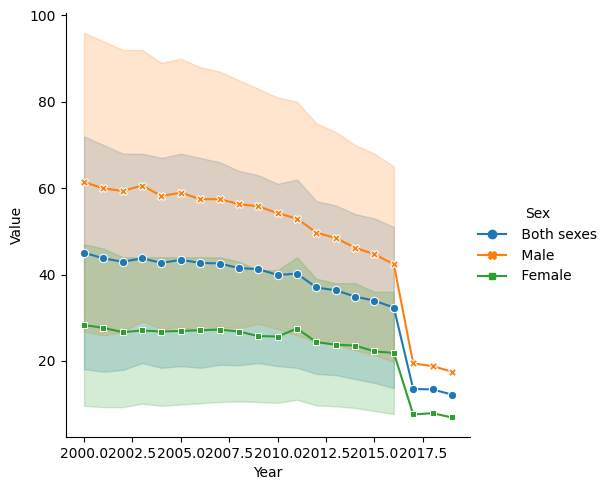

In [156]:
sns.relplot(data=japan_2.iloc[:,1:], x='Year', y='Value'
            , kind='line', dashes=False#, style='Type'
            , hue='Sex', markers=True, style='Sex'
           )
